# Prediction task to determine the religious text based on certain features given.

In [16]:
df = pd.read_csv('AllBooks_baseline_DTM_Labelled.csv')

In [17]:
df

,Unnamed: 0,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,BookOfWisdom_Ch15,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,BookOfWisdom_Ch16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,BookOfWisdom_Ch17,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
588,BookOfWisdom_Ch18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Columns: 8267 entries, foolishness to Text
dtypes: int64(8266), object(1)
memory usage: 37.2+ MB


In [26]:
def convert(value):
    if 'Buddhism' in value:
        return 'Buddhism'
    elif 'TaoTeChing' in value:
        return 'TaoTeChing'
    elif 'Upanishad' in value:
        return 'Upanishad'
    elif 'YogaSutra' in value:
        return 'YogaSutra'
    elif 'BookOfProverb' in value:
        return 'BookOfProverb'
    elif 'BookOfEcclesiastes' in value:
        return 'BookOfEcclesiastes'
    elif 'BookOfEccleasiasticus' in value:
        return 'BookOfEccleasiasticus'
    else:
        return 'BookOfWisdom'

In [27]:
df['Text'] = df['Unnamed: 0'].apply(convert)

In [30]:
df = df.drop(['Unnamed: 0'], axis=1)

In [32]:
df.head()

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains,Text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism


In [29]:
df['Text'].value_counts()

YogaSutra                189
Upanishad                162
TaoTeChing                81
BookOfEccleasiasticus     50
Buddhism                  46
BookOfProverb             31
BookOfWisdom              19
BookOfEcclesiastes        12
Name: Text, dtype: int64

In [33]:
X = df.drop(['Text'], axis=1)
y = df['Text']

In [34]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [61]:
len(X_test)

118

In [92]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [89]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    
    model.fit(X_train,y_train)
    
    preds = model.predict(X_test)
    
    print(classification_report(y_test, preds, zero_division=1))
    
    ConfusionMatrixDisplay.from_predictions(y_test, preds, xticks_rotation='vertical')

## Multinomial NB

In [91]:
help(MultinomialNB)

Help on class MultinomialNB in module sklearn.naive_bayes:

class MultinomialNB(_BaseDiscreteNB)
 |  MultinomialNB(*, alpha=1.0, fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multinomial models.
 |  
 |  The multinomial Naive Bayes classifier is suitable for classification with
 |  discrete features (e.g., word counts for text classification). The
 |  multinomial distribution normally requires integer feature counts. However,
 |  in practice, fractional counts such as tf-idf may also work.
 |  
 |  Read more in the :ref:`User Guide <multinomial_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (0 for no smoothing).
 |  
 |  fit_prior : bool, default=True
 |      Whether to learn class prior probabilities or not.
 |      If false, a uniform prior will be used.
 |  
 |  class_prior : array-like of shape (n_classes,), default=None
 |      Prior probabilities of the classe

                       precision    recall  f1-score   support

BookOfEccleasiasticus       0.44      1.00      0.61         7
   BookOfEcclesiastes       1.00      0.00      0.00         3
        BookOfProverb       0.80      0.80      0.80         5
         BookOfWisdom       1.00      0.00      0.00         3
             Buddhism       1.00      1.00      1.00        11
           TaoTeChing       1.00      1.00      1.00        17
            Upanishad       1.00      0.92      0.96        36
            YogaSutra       0.97      0.97      0.97        36

             accuracy                           0.91       118
            macro avg       0.90      0.71      0.67       118
         weighted avg       0.95      0.91      0.90       118



<Figure size 1000x600 with 0 Axes>

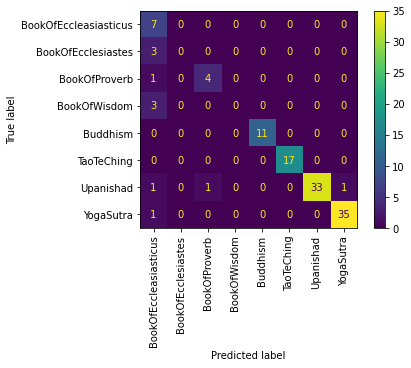

In [87]:
model = MultinomialNB()
run_model(model,X_train,y_train,X_test,y_test)

                       precision    recall  f1-score   support

BookOfEccleasiasticus       0.71      0.71      0.71         7
   BookOfEcclesiastes       1.00      0.67      0.80         3
        BookOfProverb       0.83      1.00      0.91         5
         BookOfWisdom       1.00      0.33      0.50         3
             Buddhism       1.00      0.45      0.62        11
           TaoTeChing       0.80      0.94      0.86        17
            Upanishad       0.85      0.97      0.91        36
            YogaSutra       0.94      0.94      0.94        36

             accuracy                           0.87       118
            macro avg       0.89      0.75      0.78       118
         weighted avg       0.89      0.87      0.86       118



<Figure size 1000x600 with 0 Axes>

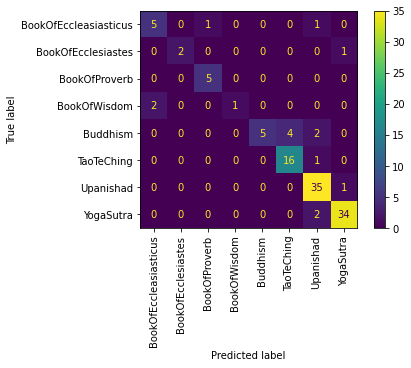

In [88]:
model = LinearSVC()`
run_model(model,X_train,y_train,X_test,y_test)

                       precision    recall  f1-score   support

BookOfEccleasiasticus       0.56      0.71      0.63         7
   BookOfEcclesiastes       1.00      0.33      0.50         3
        BookOfProverb       0.80      0.80      0.80         5
         BookOfWisdom       1.00      0.33      0.50         3
             Buddhism       1.00      0.36      0.53        11
           TaoTeChing       0.89      0.94      0.91        17
            Upanishad       0.80      0.97      0.88        36
            YogaSutra       0.94      0.94      0.94        36

             accuracy                           0.85       118
            macro avg       0.87      0.68      0.71       118
         weighted avg       0.87      0.85      0.83       118



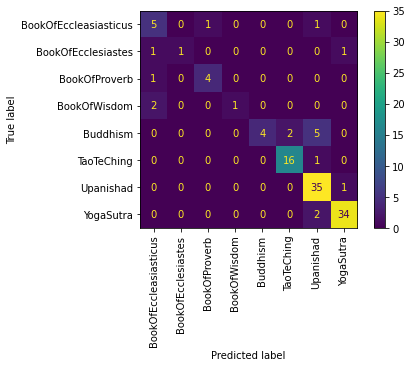

In [84]:
model = LogisticRegression(max_iter=1000)
run_model(model,X_train,y_train,X_test,y_test)

                       precision    recall  f1-score   support

BookOfEccleasiasticus       0.44      1.00      0.61         7
   BookOfEcclesiastes       1.00      0.00      0.00         3
        BookOfProverb       1.00      0.40      0.57         5
         BookOfWisdom       1.00      0.00      0.00         3
             Buddhism       0.91      0.91      0.91        11
           TaoTeChing       1.00      0.76      0.87        17
            Upanishad       0.87      0.92      0.89        36
            YogaSutra       0.89      0.94      0.92        36

             accuracy                           0.84       118
            macro avg       0.89      0.62      0.60       118
         weighted avg       0.89      0.84      0.82       118



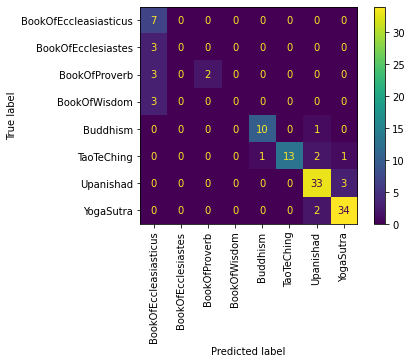

In [85]:
model = RandomForestClassifier()
run_model(model,X_train,y_train,X_test,y_test)

It can be seen that out of all the models used, MultinomialNB performed the best with a staggering 91% accuracy value